# Exercise 6.2 - TASK 

#### 1. Importing libraries, datasets and JSON files
#### 2. Wrangling Data in order to map it
#### 3. Checking for missing and extreme values
#### 4. Creating a choropleth map

## 01. Importing libraries, datasets and JSON files

In [1]:
# Importing our libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json

In [2]:
# Set max_columns to None to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Importing the JSON file
denver_geo = r'C:\Users\peter\Desktop\Career Foundry - Data Analyst\Data Immersion\Achievement 6 - Advanced Analytics\Achievement 6 - Project\02. Data\Original\neighbourhoods.geojson'

In [4]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\peter\Desktop\Career Foundry - Data Analyst\Data Immersion\Achievement 6 - Advanced Analytics\Achievement 6 - Project\02. Data\Original\neighbourhoods.geojson',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-104.998122, 39.791022], [-104.998176, 39.782565], [-104.998357, 39.782611], [-104.999343, 39.782875], [-105.000292, 39.783135], [-105.001416, 39.783473], [-105.002047, 39.783599], [-105.002421, 39.783648], [-105.002838, 39.783673], [-105.002951, 39.783667], [-105.003172, 39.783654], [-105.00351, 39.783627], [-105.004259, 39.78353], [-105.005039, 39.78342], [-105.005693, 39.783316], [-105.00597, 39.78327], [-105.006205, 39.783267], [-105.006277, 39.783267], [-105.006635, 39.783264], [-105.006694, 39.783264], [-105.007044, 39.78326], [-105.007681, 39.783334], [-105.00838, 39.783403], [-105.008874, 39.78346], [-105.009732, 39.783539], [-105.009894, 39.78355], [-105.010517, 39.783594], [-105.011082, 39.783611], [-105.014818, 39.783688], [-105.016229, 39.783717], [-105.018281, 39.783709], [-105.019266, 39.783706], [-105.019481, 39.783707], [-105.019763, 39.783718], [-105.0201, 39.783747], [-105.020333, 39.783782], 

In [5]:
# Creating the default 'path' for easier reference
path = r'C:\Users\peter\Desktop\Career Foundry - Data Analyst\Data Immersion\Achievement 6 - Advanced Analytics\Achievement 6 - Project'

In [6]:
# Importing the listings dataset
df = pd.read_pickle(os.path.join(path, '02. Data\Modified\listings_clean.pkl'))

In [7]:
df.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,360.0,666,2008-07-08,"Denver, CO",within an hour,100%,96%,t,Highland,4,4,"Denver, Colorado, United States",Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,1 bath,2.0,2.0,136.0,30,60,30,30,60,60,30.0,60.0,t,0,23,53,143,178,8,1,2018-08-13,2023-06-16,4.99,4.99,4.96,5.00,5.00,5.00,4.91,2.99
1,364.0,783,2008-07-11,"Denver, CO",nan,nan,nan,f,Five Points,1,1,"Denver, Colorado, United States",Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,179.0,185,365,185,185,365,365,185.0,365.0,t,23,53,83,358,87,0,0,2009-05-18,2016-04-26,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.51
2,590.0,933,2008-07-21,"Denver, CO",within an hour,100%,97%,nan,North Park Hill,2,2,"Denver, Colorado, United States",North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,1 shared bath,NaN,1.0,84.0,1,300,1,1,300,300,1.0,300.0,t,15,45,63,242,702,48,7,2009-03-29,2023-06-24,4.85,4.79,4.58,4.93,4.95,4.75,4.86,4.04
3,592.0,933,2008-07-21,"Denver, CO",within an hour,100%,97%,nan,North Park Hill,2,2,nan,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,1 shared bath,NaN,1.0,65.0,28,365,28,28,365,365,28.0,365.0,t,8,8,8,174,168,1,1,2009-02-21,2023-06-24,4.87,4.75,4.55,4.94,4.94,4.81,4.86,0.96
4,1940.0,2150,2008-08-16,"Denver, CO",within an hour,100%,100%,t,Baker,1,1,"Denver, Colorado, United States",Baker,39.720486,-104.997520,Entire guesthouse,Entire home/apt,2,1 bath,NaN,1.0,111.0,1,120,1,1,1125,1125,1.0,1125.0,t,6,22,44,129,132,35,2,2017-01-24,2023-06-04,4.95,4.94,4.97,4.98,4.98,4.91,4.86,1.69


In [8]:
df.shape

(5378, 48)

## 02. Wrangling data in order to map it

In [9]:
# Creating a list then subset to include only the columns we want to analyze
df_wrangle = ['neighbourhood_cleansed','room_type','price']

In [10]:
# Creating the subset dataframe
df_hoods = df[df_wrangle]

In [11]:
df_hoods

,neighbourhood_cleansed,room_type,price
0,Highland,Entire home/apt,136.0
1,Five Points,Entire home/apt,179.0
2,North Park Hill,Private room,84.0
3,North Park Hill,Private room,65.0
4,Baker,Entire home/apt,111.0
...,...,...,...
5373,Civic Center,Entire home/apt,150.0
5374,Chaffee Park,Entire home/apt,155.0
5375,Valverde,Entire home/apt,151.0
5376,West Colfax,Entire home/apt,209.0


In [12]:
# Renaming the column so that it matches our JSON file
df_hoods.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace=True)

C:\Users\peter\AppData\Local\Temp\ipykernel_7880\3933577891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoods.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace=True)


In [13]:
df_hoods.head()

,neighbourhood,room_type,price
0,Highland,Entire home/apt,136.0
1,Five Points,Entire home/apt,179.0
2,North Park Hill,Private room,84.0
3,North Park Hill,Private room,65.0
4,Baker,Entire home/apt,111.0


## 03. Checking for missing and extreme values

### Missing values check 

In [14]:
# Check for missing values
df_hoods.isnull().sum()

# No missing values, good to go!

neighbourhood    0
room_type        0
price            0
dtype: int64

### Extreme values check

<Axes: xlabel='price', ylabel='Count'>

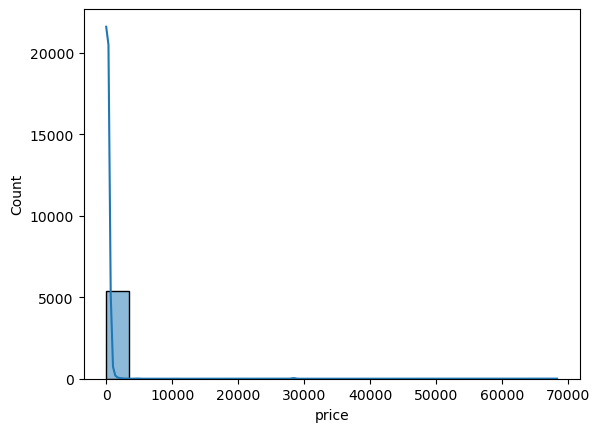

In [15]:
# Histogram to check the price distribution
sns.histplot(df_hoods['price'], bins=20, kde = True)

In [16]:
# Checking to see how many listings with price > 10000
df_hoods[df_hoods['price'] >10000]

,neighbourhood,room_type,price
560,Cheesman Park,Entire home/apt,28408.0
657,Whittier,Entire home/apt,28370.0
669,Capitol Hill,Entire home/apt,28356.0
729,Cheesman Park,Entire home/apt,28402.0
1939,West Highland,Entire home/apt,28440.0
2243,Lincoln Park,Entire home/apt,28414.0
2816,Capitol Hill,Entire home/apt,28362.0
3087,Regis,Entire home/apt,10309.0
4697,Cheesman Park,Entire home/apt,28414.0
5193,Sunnyside,Entire home/apt,68334.0


In [17]:
# Checking to see how many listings there are with a price of 0
df_hoods[df_hoods['price'] == 0]

,neighbourhood,room_type,price
1737,City Park West,Hotel room,0.0


In [18]:
# Removing the listings with a price < 10000 and > 0.
df_hoods = df_hoods[(df_hoods['price'] <10000) & (df_hoods['price'] >0)]

In [19]:
df_hoods.shape

(5367, 3)

### Calculating 'average price' for each neighborhood

In [20]:
# I want to add a column called 'avg_price' so that I can plot the data as a choropleth map

# Calculating the avg_price for each hood by grouping them, then running a transform for the mean value
df_hoods['avg_price'] = df_hoods.groupby('neighbourhood')['price'].transform('mean')

# Round the average price to two decimal places
df_hoods['avg_price'] = df_hoods['avg_price'].round(2)

C:\Users\peter\AppData\Local\Temp\ipykernel_7880\26225641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoods['avg_price'] = df_hoods.groupby('neighbourhood')['price'].transform('mean')
C:\Users\peter\AppData\Local\Temp\ipykernel_7880\26225641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoods['avg_price'] = df_hoods['avg_price'].round(2)


In [21]:
df_hoods.head()

,neighbourhood,room_type,price,avg_price
0,Highland,Entire home/apt,136.0,232.05
1,Five Points,Entire home/apt,179.0,243.91
2,North Park Hill,Private room,84.0,219.16
3,North Park Hill,Private room,65.0,219.16
4,Baker,Entire home/apt,111.0,146.87


In [22]:
# Adding the average price per neighborhood to the original data frame
df['avg_price'] = df.groupby('neighbourhood_cleansed')['price'].transform('mean')

# Round the average price to two decimal places
df['avg_price'] = df['avg_price'].round(2)

In [23]:
df.columns

Index(['id', 'host_id', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communicatio

In [24]:
df.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,avg_price
0,360.0,666,2008-07-08,"Denver, CO",within an hour,100%,96%,t,Highland,4,4,"Denver, Colorado, United States",Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,1 bath,2.0,2.0,136.0,30,60,30,30,60,60,30.0,60.0,t,0,23,53,143,178,8,1,2018-08-13,2023-06-16,4.99,4.99,4.96,5.00,5.00,5.00,4.91,2.99,232.05
1,364.0,783,2008-07-11,"Denver, CO",nan,nan,nan,f,Five Points,1,1,"Denver, Colorado, United States",Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,179.0,185,365,185,185,365,365,185.0,365.0,t,23,53,83,358,87,0,0,2009-05-18,2016-04-26,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.51,243.91
2,590.0,933,2008-07-21,"Denver, CO",within an hour,100%,97%,nan,North Park Hill,2,2,"Denver, Colorado, United States",North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,1 shared bath,NaN,1.0,84.0,1,300,1,1,300,300,1.0,300.0,t,15,45,63,242,702,48,7,2009-03-29,2023-06-24,4.85,4.79,4.58,4.93,4.95,4.75,4.86,4.04,219.16
3,592.0,933,2008-07-21,"Denver, CO",within an hour,100%,97%,nan,North Park Hill,2,2,nan,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,1 shared bath,NaN,1.0,65.0,28,365,28,28,365,365,28.0,365.0,t,8,8,8,174,168,1,1,2009-02-21,2023-06-24,4.87,4.75,4.55,4.94,4.94,4.81,4.86,0.96,219.16
4,1940.0,2150,2008-08-16,"Denver, CO",within an hour,100%,100%,t,Baker,1,1,"Denver, Colorado, United States",Baker,39.720486,-104.997520,Entire guesthouse,Entire home/apt,2,1 bath,NaN,1.0,111.0,1,120,1,1,1125,1125,1.0,1125.0,t,6,22,44,129,132,35,2,2017-01-24,2023-06-04,4.95,4.94,4.97,4.98,4.98,4.91,4.86,1.69,146.87


In [25]:
df['avg_price'].value_counts()

243.91    452
232.05    345
211.20    243
212.37    214
245.64    199
         ... 
132.67      6
78.33       3
170.67      3
190.67      3
118.00      1
Name: avg_price, Length: 78, dtype: int64

## 04. Plotting the data with a choropleth map

In [26]:
# Creating data frame of just the 'neighbourhood' and the 'avg_price'

hood_to_plot = df_hoods[['neighbourhood','avg_price']]
hood_to_plot.head()

,neighbourhood,avg_price
0,Highland,232.05
1,Five Points,243.91
2,North Park Hill,219.16
3,North Park Hill,219.16
4,Baker,146.87


In [27]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [39.7392, -104.9903], zoom_start = 11)

folium.Choropleth(
    geo_data = denver_geo, 
    data = hood_to_plot,
    columns = ['neighbourhood','avg_price'],
    key_on = 'feature.properties.neighbourhood', 
    fill_color = 'Blues', fill_opacity=0.7, line_opacity=0.1,
    legend_name = "Price").add_to(map)
folium.LayerControl().add_to(map)

map

In [28]:
# Saving the map file
map.save('plot_data.html')

In [29]:
# I want to look more into the top 10 neighborhoods based on avg_price

# Group by 'neighbourhood' and calculate the mean 'avg_price' for each group
grouped_neighborhoods = df_hoods.groupby('neighbourhood')['avg_price'].mean().reset_index()

# Sort the grouped DataFrame by 'avg_price' in descending order
sorted_neighborhoods = grouped_neighborhoods.sort_values(by='avg_price', ascending=False)

# Keep only the top 10 unique neighborhoods
top_10 = sorted_neighborhoods.drop_duplicates(subset='neighbourhood').head(10)

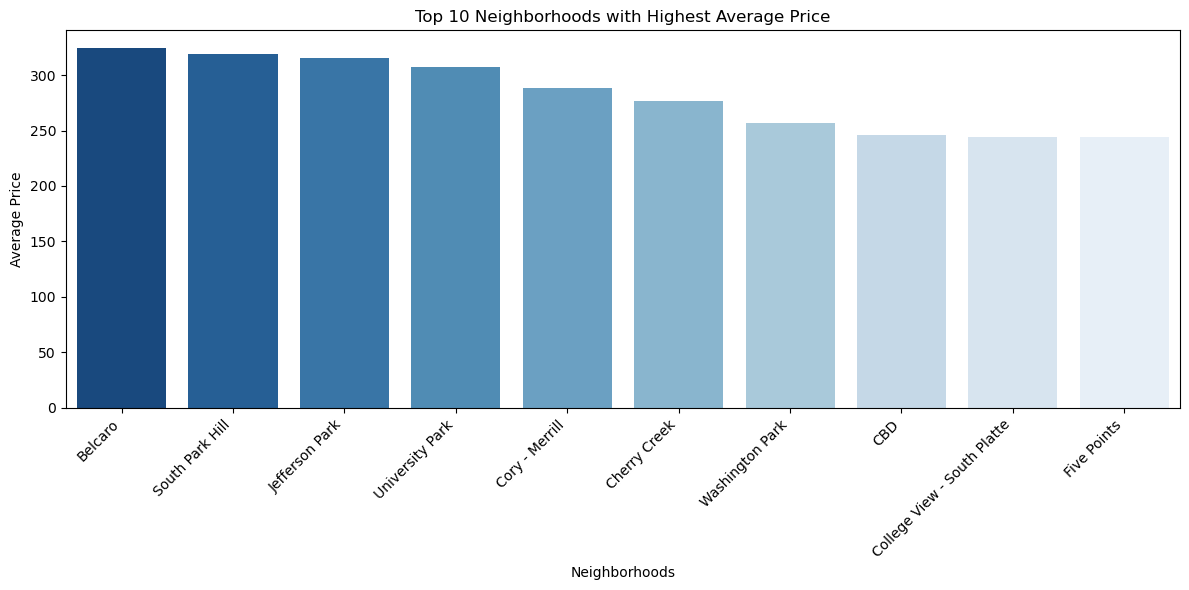

In [30]:
# Create a barplot using Seaborn with the reversed color palette (YlGnBu)
color_palette = list(reversed(sns.color_palette('Blues', n_colors=10)))

plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood', y='avg_price', data=top_10, palette=color_palette)
plt.xlabel('Neighborhoods')
plt.ylabel('Average Price')
plt.title('Top 10 Neighborhoods with Highest Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Getting the top 10 neighborhoods with the highest number of listings
top_10_count = df_hoods.value_counts('neighbourhood').nlargest(10)

In [32]:
top_10_count

neighbourhood
Five Points      452
Highland         345
West Colfax      243
Union Station    214
CBD              199
Gateway - GVR    176
Berkeley         170
Sunnyside        168
West Highland    160
Speer            154
dtype: int64

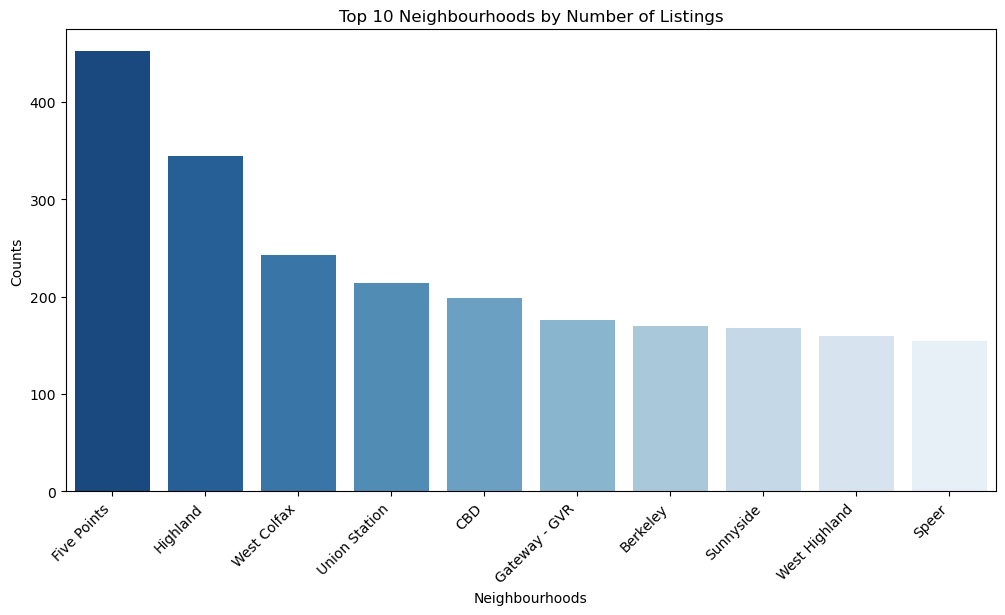

In [33]:
# Creating a simple bar chart of the top 5

# Changing the colors of the chart
color_palette = list(reversed(sns.color_palette('Blues', n_colors=10)))

# Create the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_count.index, y=top_10_count.values, palette=color_palette)
plt.xlabel('Neighbourhoods')
plt.ylabel('Counts')
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.show()

### Based on the results from the choropleth map and the additional histogram I created, I am getting a better understanding of the different neighborhoods. One of the questions that I had formulated was "if the neighborhood was closer to the downtown area, it would have a higher price." With my brief understanding of the city of Denver (or if I was to do some additional external research) I can see that the darker shades of blue on the map do infact land around areas that are downtown or more metro. The more rural areas to the SW look to have a lower average price of listings. I do not know how to plot it on the map, but it would be helpful to have the number of listings in each of those areas so I could visually get a better understanding of the density. 

### As a follow up to this analysis, I am thinking that it would be helpful to create multiple charts for the city and have different tiers of listings and the price averages for each of those. For example, I could create a flag that looks to see if the neighbourhood has 0-50 listings and call it "low popularity". I could do the same for 2 other specified tiers. Then I could create 3 different pricing choropleth maps to get a better understanding of how they are grouped and how the pricing varries. 

### From the histograms I created, I would also want to compare the overlapping neighbourhoods: which ones are both in the top 10 in terms of pricing as well as the top 10 of number of listings? I would also be curious to examine the bottom end of the data too and create histograms for the bottom 10 neighbourhoods in terms of pricing and number of listings. 

In [35]:
# Exporting data frame
df.to_csv(os.path.join(path, '02. Data', 'Modified', 'listings_avg_price.csv'))